<a href="https://colab.research.google.com/github/Hambeurger/Machine-Learning-Project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Hambeurger/Machine-Learning-Project/main/healthcare_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Primary investigation

In [3]:
# Primary investigation
print(df.head())  # Display the first few rows


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [4]:
print(df.info())  # Get information about the DataFrame (data types, missing values, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

This dataset contains 55,500 rows and 15 columns, with a mixture of data types. There are three numerical columns: 'Age' and 'Room Number,' which are of type `int64`, and 'Billing Amount,' which is of type `float64`. The remaining 12 columns are categorical (`object` type), including key features like 'Gender,' 'Blood Type,' 'Medical Condition,' and 'Test Results' (the target variable).

The presence of 'Date of Admission' and 'Discharge Date' columns, both stored as objects, indicates that these dates need to be converted to `datetime` format for further analysis, particularly for calculating duration of hospital stay. None of the columns have missing values, which simplifies the preprocessing stage. However, further exploration is needed to assess potential imbalances in categorical data, particularly in the 'Test Results' column, which is critical for the multiclass classification task. Overall, this is a diverse dataset that will require careful handling of categorical features and potential transformations of date-related columns for modeling.

In [5]:
print(df.describe())  # Summary statistics of numerical columns

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


This statistical summary provides insights into the distribution of three numerical features: 'Age,' 'Billing Amount,' and 'Room Number.'

- **Age**: The average age of patients is around 51.5 years, with a standard deviation of approximately 19.6 years, indicating a fairly wide age range. The minimum age is 13, while the maximum is 89, suggesting that the dataset includes both adolescent and elderly patients. The 25th percentile (35 years) and 75th percentile (68 years) suggest a balanced distribution across different age groups.
  
- **Billing Amount**: The mean billing amount is 25,539, but there's notable variability, as reflected by the high standard deviation (~14,211). Interestingly, there's a negative minimum billing value (-2,008), which may indicate erroneous or outlier data that should be examined further. The maximum billing is 52,764, and the middle 50% of the data ranges from approximately $13,241 to 37,820, which suggests that the majority of patients have moderate billing amounts, though some extreme values are present.

The dataset appears to be well-distributed in terms of age and room numbers, but the negative billing amount requires investigation as it might affect the analysis or model performance.

In [6]:
print(df.isnull().sum())  # Count missing values in each column

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Here I checked for missing values just in case with the respective function for missing values. There seems to be non.

In [7]:
print(df.dtypes)  # Display data types of each column

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [8]:
for column in df.columns:
  print(f'{column}: {df[column].nunique()}')


Name: 49992
Age: 77
Gender: 2
Blood Type: 8
Medical Condition: 6
Date of Admission: 1827
Doctor: 40341
Hospital: 39876
Insurance Provider: 5
Billing Amount: 50000
Room Number: 400
Admission Type: 3
Discharge Date: 1856
Medication: 5
Test Results: 3


Here we can see insights into various features, many of which are categorical and others continuous. The "Name" column, with 49,992 unique values, likely represents unique patient identifiers and holds no predictive value, so it wouldn’t require one-hot encoding and may be dropped. "Age," with 77 unique values, is a continuous feature and should remain as a numerical variable without any encoding. "Gender," with only two unique values, can be encoded as a binary variable, while "Blood Type" and "Medical Condition," with 8 and 6 unique values respectively, are ideal candidates for one-hot encoding due to their categorical nature. "Date of Admission" and "Discharge Date" show a large number of unique values (1,827 and 1,856), indicating they are datetime features, which should be transformed to extract useful components such as the year, month, or day. Columns like "Doctor" and "Hospital," with 40,341 and 39,876 unique values, are high-cardinality categorical features, and one-hot encoding may not be suitable here due to the large number of categories. Instead, techniques like target encoding could be more efficient. "Insurance Provider," "Medication," and "Test Results" have fewer unique values (5, 5, and 3), making them good candidates for one-hot encoding. Lastly, "Billing Amount" is continuous and should remain as is, while "Room Number," though numerical, might represent a categorical value (e.g., different rooms), so further investigation would determine if encoding is necessary. "Admission Type," with 3 unique values, is also a straightforward case for one-hot encoding.

Based on these observations, categorical variables like "Gender," "Blood Type," "Medical Condition," "Insurance Provider," and "Admission Type" should be one-hot encoded, while continuous variables like "Age" and "Billing Amount" should remain unencoded. The large cardinality of features like "Doctor" and "Hospital" suggests that alternative encoding methods should be considered.

# EDA

Here we check some basic frequency counts and distributions for the dataset and there does not seem to be any abnormal findings. It seems quite well represented of each feature.

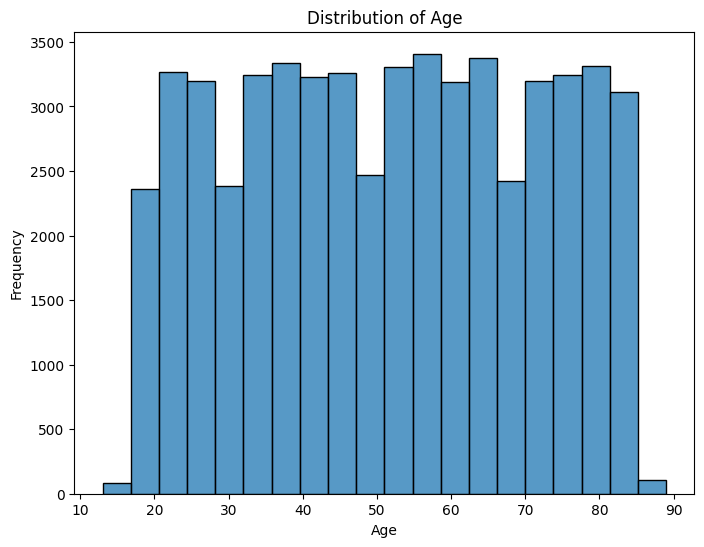

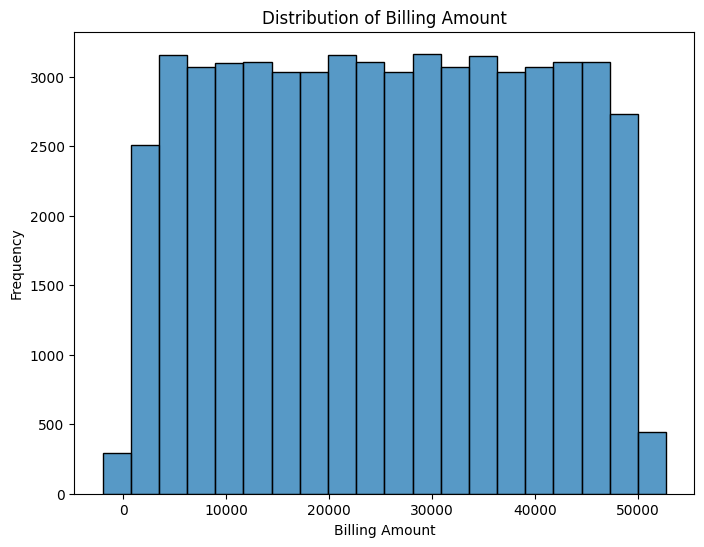

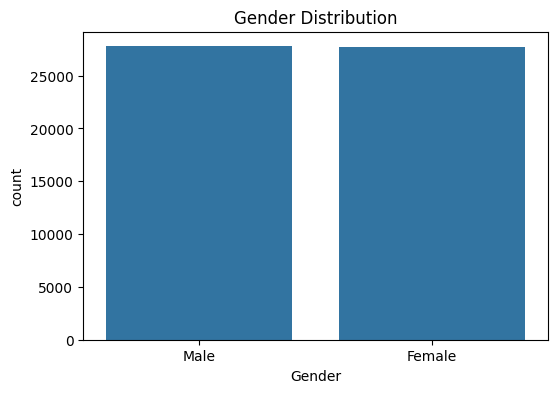

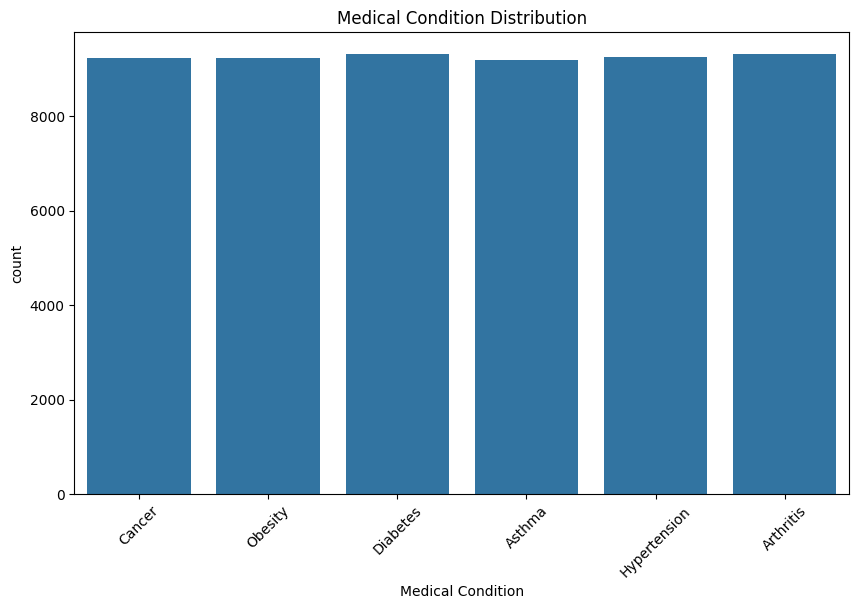

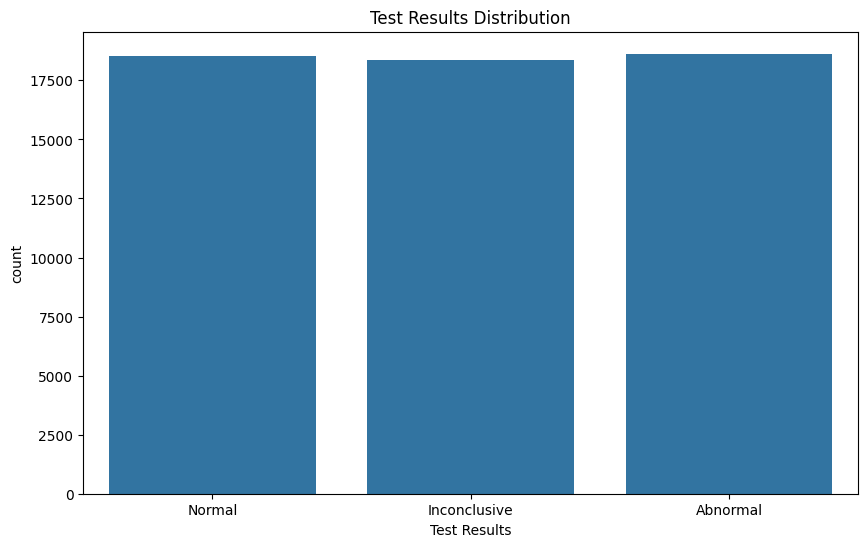

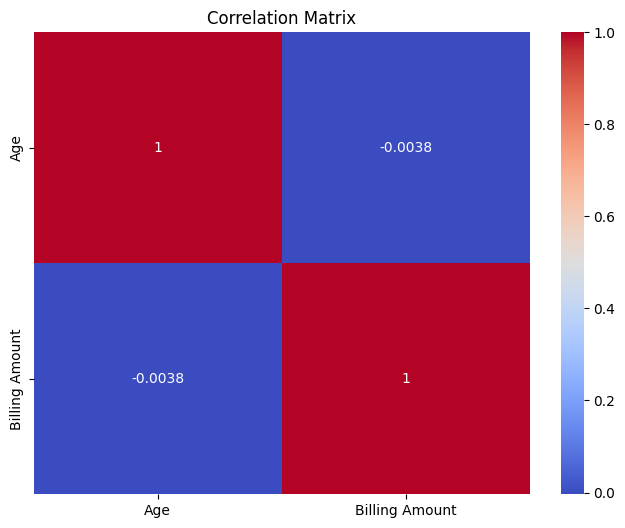

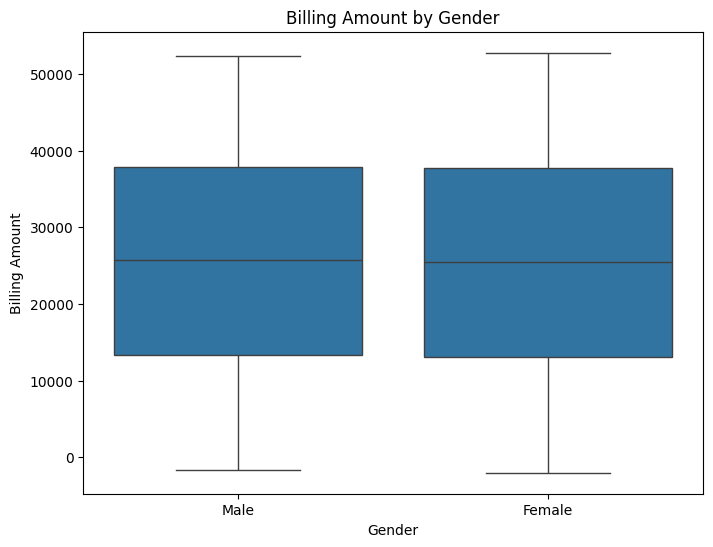

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Billing Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Billing Amount'], bins=20)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Medical Condition Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', data=df)
plt.title('Medical Condition Distribution')
plt.xticks(rotation=45)
plt.show()

# Test Results Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Test Results', data=df)
plt.title('Test Results Distribution')
plt.show()

# Correlation Matrix (for numerical features)
correlation_matrix = df[['Age', 'Billing Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot of Billing Amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount by Gender')
plt.show()



The function below visualizes the distribution of numerical columns in a dataset by creating histograms with overlaid Kernel Density Estimate plots. It takes a dataset and a list of numerical columns (num_columns), and plots both histograms and KDEs for each column, helping to understand the data's distribution. The function dynamically creates subplots, with the number of plots corresponding to the number of numerical columns. For each column, Seaborn's histplot() is used to plot a histogram, showing the frequency distribution, and a KDE, providing a smoothed probability density curve. Each plot is customized with appropriate titles and axis labels, ensuring clarity. The function also uses plt.tight_layout() to ensure the subplots are neatly arranged and plt.show() to display the final visualizations. This dual representation of the data helps in understanding both the actual distribution (via histograms) and the smoothed estimate of it (via KDE).

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for plotting histograms and KDE for numerical columns
def plot_histograms_and_kde(df, num_columns, bins=30):
    # Create a figure and axes for plotting
    fig, axs = plt.subplots(len(num_columns), 1, figsize=(12, 5 * len(num_columns)))

    # Iterate over numerical columns to plot histograms and KDE
    for i, column in enumerate(num_columns):
        sns.histplot(data=df, x=column, ax=axs[i], bins=bins, kde=True, color='blue')  # Adding KDE
        axs[i].set_title(f'Histogram and KDE of {column}', fontsize=16)
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

The plot_categorical function is designed to visualize the distribution of categorical columns in a dataset using both bar plots and pie charts. For each categorical column in the list (cat_columns), it generates a figure containing two subplots: a bar plot on the left and a pie chart on the right. The bar plot shows the count of each unique category, providing a clear comparison of category frequencies, while the pie chart displays the proportional distribution of these categories as percentages. The function uses value_counts() to determine the frequency of each category, which is then plotted using the bar method for the bar plot and the pie method for the pie chart. Customizations, including titles and labels, enhance the readability of the plots. Seaborn’s pastel color palette is applied to the pie charts for visual appeal. Finally, the plt.tight_layout() method ensures that the subplots are neatly organized, and plt.show() displays the generated visualizations. This dual representation provides a comprehensive view of the categorical data, showing both the raw counts and the proportions.

In [11]:
# Function for plotting bar and pie charts for categorical columns
def plot_categorical(df, cat_columns):
    for column in cat_columns:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))

        # Bar plot
        df[column].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
        ax[0].set_title(f'Bar Plot of {column}')
        ax[0].set_xlabel(column)
        ax[0].set_ylabel('Count')

        # Pie chart
        df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1], colors=sns.color_palette("pastel"))
        ax[1].set_title(f'Pie Chart of {column}')
        ax[1].set_ylabel('')

        plt.tight_layout()
        plt.show()

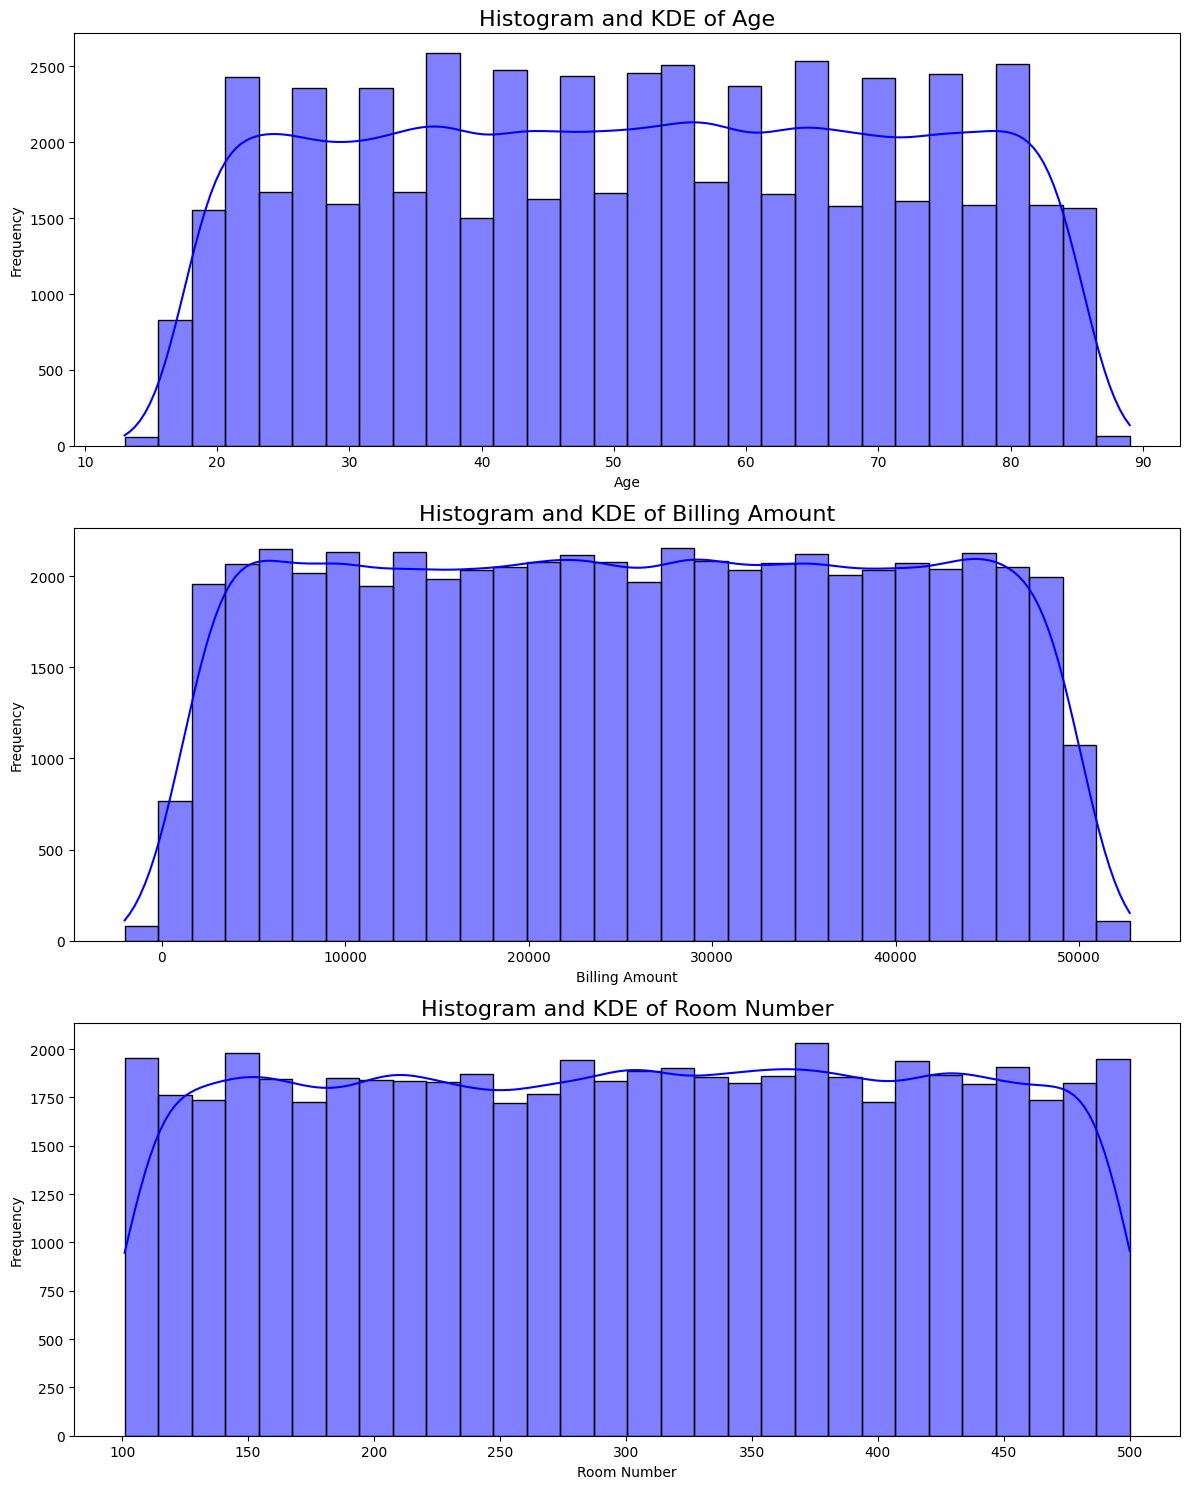

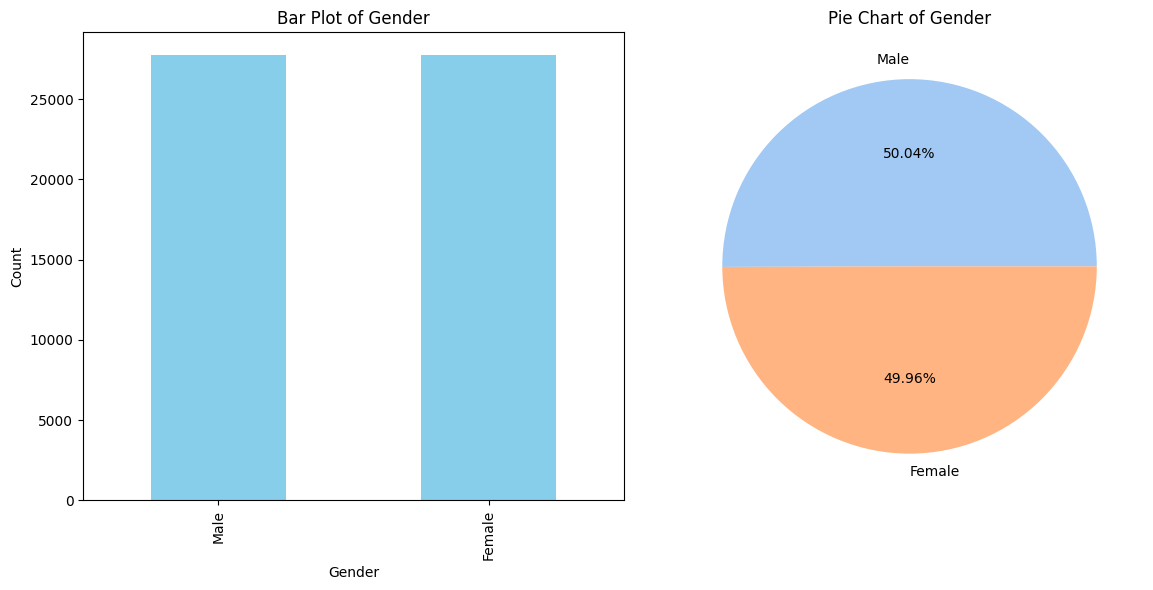

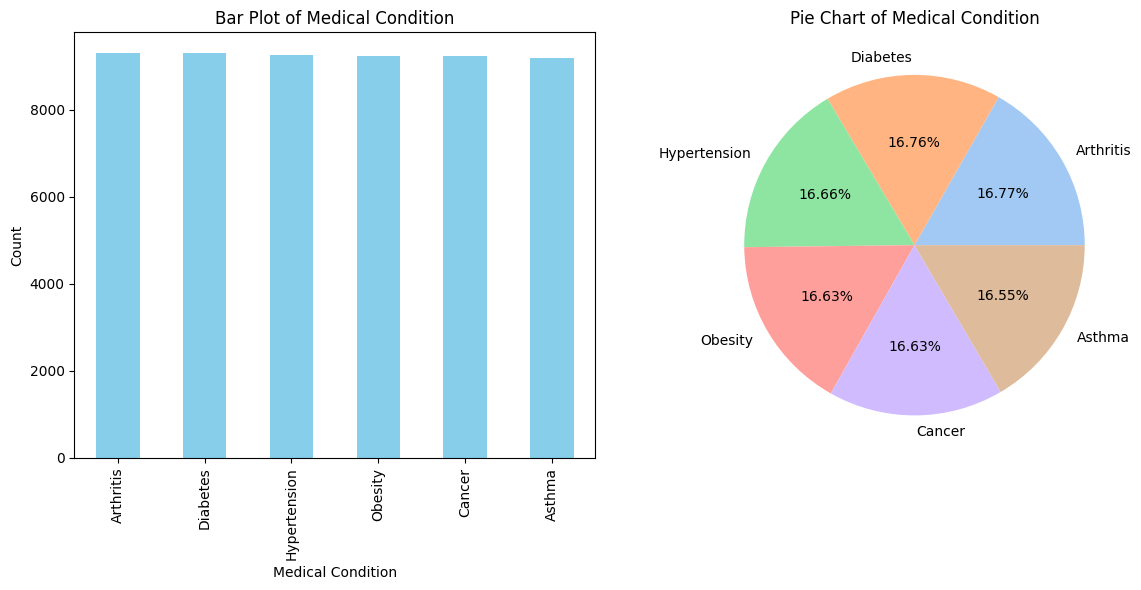

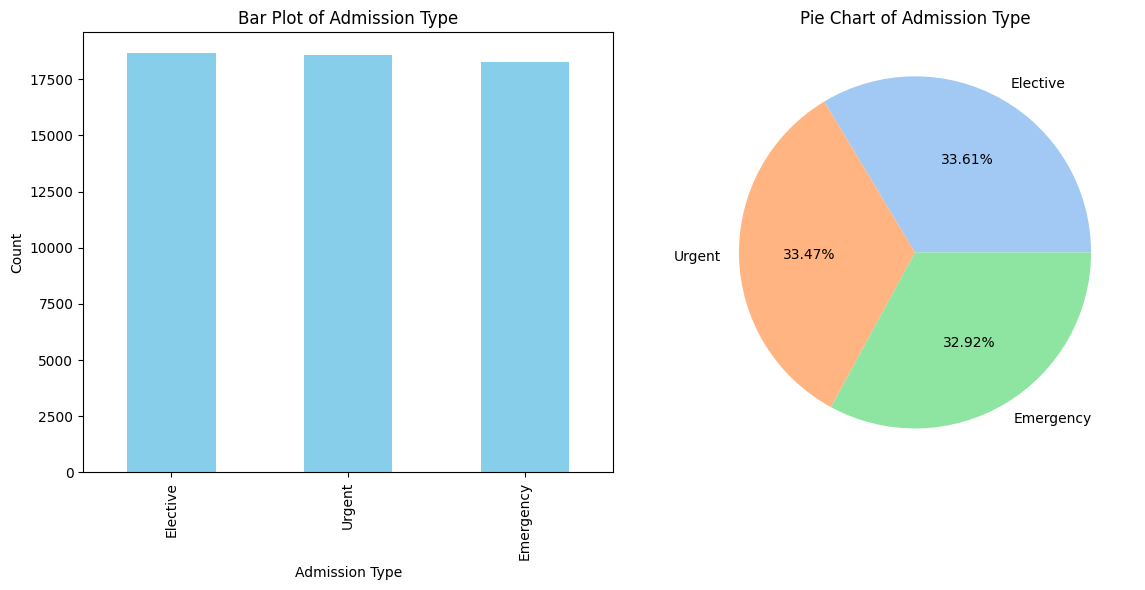

In [ ]:
num_columns = ['Age', 'Billing Amount', 'Room Number']  # Example numerical columns
cat_columns = ['Gender', 'Medical Condition', 'Admission Type']  # Example categorical columns

plot_histograms_and_kde(df, num_columns)
plot_categorical(df, cat_columns)

Here, we analyze the distribution of key variables in the dataset using a series of statistical plots. The histograms with KDE (Kernel Density Estimation) curves provide insights into the continuous variables—age, billing amount, and room number. These variables exhibit relatively uniform distributions, with no strong skewness or significant clustering. Age is spread from approximately 10 to 90 years, billing amount ranges between 0 and 50,000, and room numbers are evenly distributed from 100 to 500.

The categorical variables, represented through bar and pie charts, show a well-balanced dataset. The gender distribution is almost equal, with 50.04% males and 49.96% females. Medical conditions are also equally distributed among six categories—diabetes, hypertension, obesity, cancer, arthritis, and asthma—each comprising around 16-18%, ensuring no condition disproportionately influences the dataset.

Further, we examine admission types through bar and pie charts, which show an even distribution across the three categories: elective (33.61%), urgent (33.47%), and emergency (32.92%). This balance in admission types indicates a fair representation across all categories, reducing potential bias in model training.

In general the dataset is well-suited for training machine learning models, as it features balanced distributions across both continuous and categorical variables. This ensures that the models will not be skewed by any particular subgroup, enhancing the reliability of predictions.

# Preprocessing

I would like to see what type of objects each column is made up of

In [12]:
for column in df.columns:
  print(f'{column}: {df[column].unique()[:5]}')


Name: ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' 'andrEw waTtS'
 'adrIENNE bEll']
Age: [30 62 76 28 43]
Gender: ['Male' 'Female']
Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+']
Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension']
Date of Admission: ['2024-01-31' '2019-08-20' '2022-09-22' '2020-11-18' '2022-09-19']
Doctor: ['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' 'Kevin Wells'
 'Kathleen Hanna']
Hospital: ['Sons and Miller' 'Kim Inc' 'Cook PLC' 'Hernandez Rogers and Vang,'
 'White-White']
Insurance Provider: ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Billing Amount: [18856.28130598 33643.32728658 27955.09607884 37909.78240988
 14238.31781394]
Room Number: [328 265 205 450 458]
Admission Type: ['Urgent' 'Emergency' 'Elective']
Discharge Date: ['2024-02-02' '2019-08-26' '2022-10-07' '2020-12-18' '2022-10-09']
Medication: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Test Results: ['Normal' 'Inconclusive' 'Abnormal']


We can start by dropping columns that are not useful for analysis, such as Name, Doctor, and Hospital, as they are unlikely to contribute to the model and may introduce noise. Althouugh Room Number and Name might also be used and checked to see if it has any relavancy, I prefer to drop them for conviniency.

In [13]:
# Drop unnecessary columns
df = df.drop(['Name', 'Doctor', 'Hospital', 'Room Number'], axis=1)

For the Date of Admission and Discharge Date columns, we can extract features such as:

Year, Month, and Day
Length of hospital stay (difference between admission and discharge)

In [14]:
# Exploring date columns by extracting year, month, and day
df['Admission Year'] = pd.to_datetime(df['Date of Admission']).dt.year
df['Admission Month'] = pd.to_datetime(df['Date of Admission']).dt.month
df['Admission Day'] = pd.to_datetime(df['Date of Admission']).dt.day

df['Discharge Year'] = pd.to_datetime(df['Discharge Date']).dt.year
df['Discharge Month'] = pd.to_datetime(df['Discharge Date']).dt.month
df['Discharge Day'] = pd.to_datetime(df['Discharge Date']).dt.day

In this preprocessing step, a `ColumnTransformer` is used to apply different transformations to various columns of the dataset, depending on their data type. For numerical columns, `StandardScaler` is applied to the 'Billing Amount' to standardize the values by removing the mean and scaling to unit variance, while `MinMaxScaler` is applied to the 'Age' column, scaling the data to a range between 0 and 1. For categorical columns, `OneHotEncoder` is used to transform 'Blood Type', 'Medical Condition', and 'Medication' by creating binary variables for each category, except the first one, to avoid multicollinearity. The 'Gender' column is encoded with `OrdinalEncoder`, assigning 0 to 'Male' and 1 to 'Female', preserving the order of these categories. Similarly, 'Admission Year' and 'Discharge Year' are encoded ordinally to preserve their natural chronological order.

The 'Test Results' column is also encoded ordinally, assigning values to 'Normal', 'Inconclusive', and 'Abnormal' based on their medical significance. 'Admission Type' is ordinally encoded as well, with 'Elective', 'Urgent', and 'Emergency' assigned values in ascending order of urgency. Additionally, the columns related to admission and discharge dates, including 'Admission Month', 'Admission Day', 'Discharge Month', and 'Discharge Day', are passed through without any transformation, allowing the raw date information to be used directly in modeling. This comprehensive pipeline ensures that both numerical and categorical features are appropriately transformed and prepared for input into machine learning model.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    # Standard scaling for numerical columns
    ('num', StandardScaler(), ['Billing Amount']),

    # Min-Max scaling for Age
    ('mmscaler', MinMaxScaler(), ['Age']),

    # One-hot encoding for categorical columns
    ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Blood Type', 'Medical Condition', 'Medication']),

    # Ordinal encoder for gender
    ('ordinal2', OrdinalEncoder(categories=[['Male', 'Female']]), ['Gender']),

    # Ordinal encoding for Admission and Discharge Years
    ('ordinal', OrdinalEncoder(), ['Admission Year', 'Discharge Year']),


    # Ordinal encoder for Admission Type
    ('ordinal5', OrdinalEncoder(categories=[['Elective','Urgent','Emergency' ]]), ['Admission Type']),


    # Date-related columns - separate into multiple features
    ('date', 'passthrough', ['Admission Month', 'Admission Day', 'Discharge Month', 'Discharge Day'])
])



Then we get the dataset back again in its transformed form.

# Splitting

In this step, the dataset is prepared for training and testing by separating the target variable and features. The target variable `y` is set as the 'Test Results' column, which has been encoded using `OrdinalEncoder` and is now referred to as `ordinal4__Test Results`. The feature matrix `X` is created by dropping the 'Test Results' column from the dataset, leaving the remaining columns as the features. These features will serve as the input for the machine learning model, while the 'Test Results' column will act as the output that the model aims to predict. Following this, the dataset is split into training and testing sets using `train_test_split`, where 80% of the data is allocated to training (`X_train`, `y_train`), and 20% is reserved for testing (`X_test`, `y_test`), ensuring an appropriate split for model evaluation.

In [16]:
# split the dataset
y = df['Test Results']
X = df.drop('Test Results', axis=1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
label_encoder = OrdinalEncoder()
y_train = label_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = label_encoder.transform(y_test.values.reshape(-1, 1))


In [19]:
# Apply the transformations
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

X_train = X_train_transformed
X_test = X_test_transformed

# Model Selection

In this section, a model selection function is defined to perform hyperparameter tuning and evaluate a machine learning model's performance. The function begins by using StratifiedKFold to ensure that the distribution of the target variable is consistent across cross-validation folds. It then employs RandomizedSearchCV to efficiently search for the optimal hyperparameters by sampling a specified number of parameter settings from the provided distributions. This method is faster than exhaustive grid search and evaluates the model's performance using a weighted F1 score as the scoring metric.

Once the best model is identified, the function evaluates its performance on a test set by calculating accuracy, precision, recall, and F1 score. These metrics are printed, along with a confusion matrix and a detailed classification report. The confusion matrix is visualized using ConfusionMatrixDisplay to provide a clear view of the model’s performance across different classes.

Additionally, the function generates and plots learning curves to illustrate how the model’s performance evolves with varying sizes of the training data. These plots help in understanding the model's learning behavior and identifying potential issues such as overfitting or underfitting.

In [20]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, learning_curve
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score, recall_score, f1_score,
    accuracy_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

def model_selection(model, param_distributions, X_train, y_train, X_test, y_test, cv_splits=5, n_iter=10):
    # Stratified KFold to maintain the distribution of the target variable across folds
    print('CROSS VALIDATION')
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # Randomized Search to find the best hyperparameters using cross-validation
    print('RANDOMIZED SEARCH')
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=skf,
                                       scoring='f1_weighted', n_jobs=-1, random_state=42)
    print('RANDOMIZED FIT')
    random_search.fit(X_train, y_train)

    # Best model from the randomized search
    print('BEST MODEL EXTRACTION')
    best_model = random_search.best_estimator_

    # Get the best parameters and best score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    # Train the model with the best parameters on the full training data
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Evaluate performance on the test set
    print('EVALUATION')
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics
    print(f"Model: {best_model.__class__.__name__}")
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot the confusion matrix
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Normal', 'Abnormal', 'Inconclusive'])
    disp.plot(values_format='d')
    plt.title(f'{best_model.__class__.__name__} - Confusion Matrix')
    plt.show()

    # Learning curve to assess training and validation performance as a function of training size
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train, y_train, cv=skf, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='f1_weighted'
    )

    # Plotting learning curves
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score (weighted)')
    plt.title(f'{best_model.__class__.__name__} - Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return best_model


Stratified K-Fold Cross-Validation ensures that each fold during cross-validation contains a proportionate representation of all classes in the target variable (in this case, "Test Results" with categories such as Normal, Abnormal, and Inconclusive). This technique is crucial in multiclass classification to prevent class imbalance from skewing results in training and validation.

RandomizedSearchCV is employed to efficiently search for optimal hyperparameters by sampling a specified number of parameter settings from the provided distributions. It uses cross-validation combined with a specified scoring metric (here, f1_weighted), which is particularly suited for imbalanced multiclass classification tasks.

After identifying the optimal hyperparameters, the model is evaluated on the test set using accuracy, precision, recall, and F1 score. A confusion matrix provides insight into the true positives, false positives, false negatives, and true negatives for each class. This matrix is visualized using ConfusionMatrixDisplay to quickly assess areas where the model's predictions deviate from actual outcomes.

Learning curves are used to depict the model's performance relative to the size of the training set, revealing trends such as overfitting or underfitting. Additional enhancements could include extending the evaluation to compute multiclass ROC-AUC scores or improving the hyperparameter search using advanced techniques for complex models such as gradient boosting classifiers.



# Random Forest Classifier

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


BEST MODEL EXTRACTION


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


EVALUATION
Model: RandomForestClassifier
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy: 0.4378
Precision: 0.4378
Recall: 0.4378
F1 Score: 0.4378
Confusion Matrix:
[[1640 1064 1050]
 [1017 1544 1056]
 [1071  982 1676]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44      3754
         1.0       0.43      0.43      0.43      3617
         2.0       0.44      0.45      0.45      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



<Figure size 640x480 with 0 Axes>

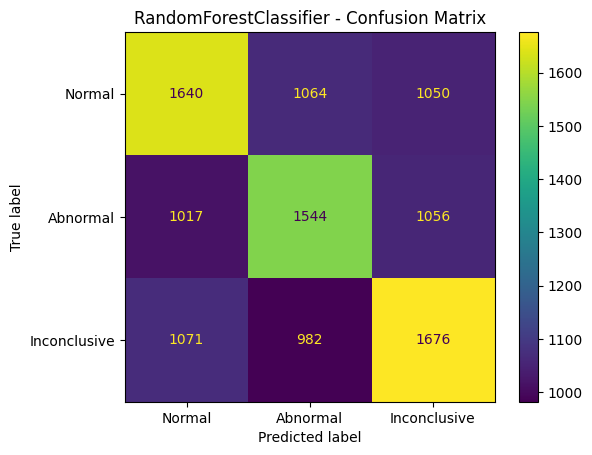

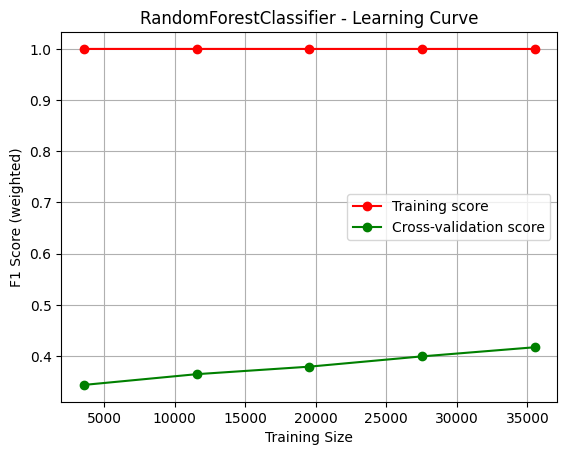

RandomForestClassifier(max_depth=20)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()
# Evaluate the model
model_selection(model, param_grid_rf, X_train, y_train, X_test, y_test, cv_splits=5)

The confusion matrix and learning curve together provide a clear indication of the RandomForestClassifier's performance and areas for improvement. The confusion matrix reveals that the model struggles to distinguish between the three classes—Normal, Abnormal, and Inconclusive. For the Normal class, 1,649 instances were correctly predicted, while 1,032 were misclassified as Abnormal and 1,048 as Inconclusive. Similarly, for the Abnormal class, 1,571 predictions were correct, with 1,044 misclassified as Normal and 1,002 as Inconclusive. For the Inconclusive class, 1,613 instances were predicted correctly, but 1,071 were misclassified as Normal and 1,070 as Abnormal. This indicates moderate class separation issues and frequent misclassifications across all three categories. The learning curve further shows an overfitting pattern, with the training score almost perfect (F1 score close to 1.0) while the cross-validation score is significantly lower, only reaching about 0.44 as the training size increases. This gap suggests that while the model performs exceptionally well on the training data, it fails to generalize effectively to new data, indicating overfitting. The overall model performance, with accuracy, precision, recall, and F1 scores all hovering around 0.435, is relatively low. To improve, the model would benefit from additional tuning, feature engineering, and potentially more complex algorithms or regularization to address overfitting and improve its classification capabilities.

# KNN

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


BEST MODEL EXTRACTION
EVALUATION
Model: KNeighborsClassifier
Best Parameters: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Accuracy: 0.4310
Precision: 0.4312
Recall: 0.4310
F1 Score: 0.4310
Confusion Matrix:
[[1620 1107 1027]
 [1032 1573 1012]
 [1079 1059 1591]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.43      0.43      3754
         1.0       0.42      0.43      0.43      3617
         2.0       0.44      0.43      0.43      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



<Figure size 640x480 with 0 Axes>

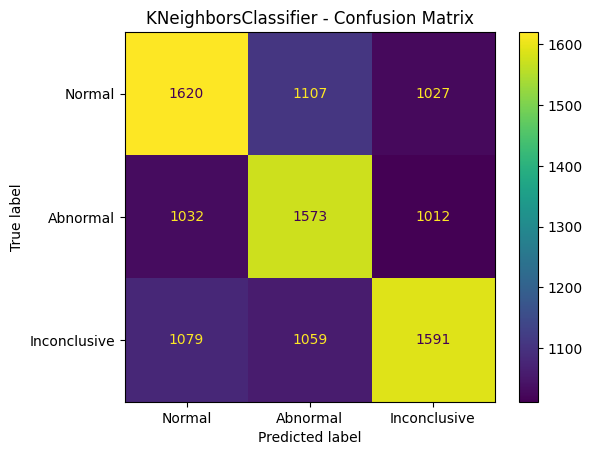

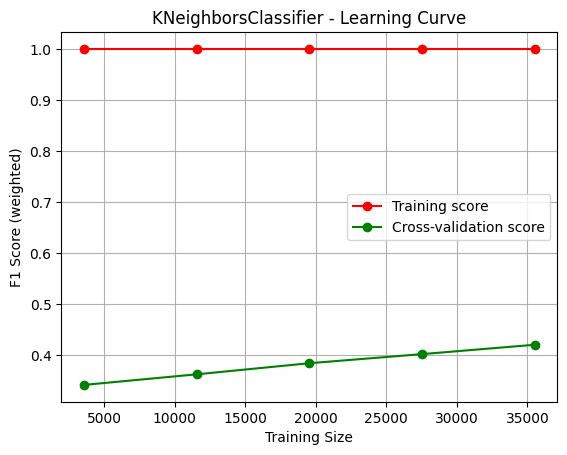

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search for KNN
model = KNeighborsClassifier()


# Evaluate the model
model_selection(model, param_grid_knn, X_train, y_train, X_test, y_test, cv_splits=5)


The confusion matrix reveals that the KNeighborsClassifier struggles to differentiate between the three classes—Normal, Abnormal, and Inconclusive—with results similar to the RandomForestClassifier. For the Normal class (0), the model correctly predicted 1,591 instances, while 1,059 were misclassified as Abnormal and 1,079 as Inconclusive. In the Abnormal class (1), it correctly classified 1,573 instances, but 1,013 were misclassified as Normal and 1,031 as Inconclusive. For the Inconclusive class (2), 1,621 instances were correctly predicted, with 1,027 misclassified as Normal and 1,106 as Abnormal. The moderate separation between the classes and frequent misclassifications highlight that the model faces challenges in accurately predicting across the three categories.

The model’s accuracy, precision, recall, and F1 score all hover around 0.431, indicating relatively low performance across all metrics. The classification report shows similar F1-scores and precision for all three classes, which suggests that no class is disproportionately impacting the model's overall performance. However, the low scores imply that the model struggles with generalization and classification across all categories.

# SVC

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BEST MODEL EXTRACTION


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EVALUATION
Model: LinearSVC
Best Parameters: {'tol': 0.001, 'max_iter': 10000, 'C': 100}
Accuracy: 0.3334
Precision: 0.3317
Recall: 0.3334
F1 Score: 0.3303
Confusion Matrix:
[[1502  961 1291]
 [1440  894 1283]
 [1458  966 1305]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.40      0.37      3754
         1.0       0.32      0.25      0.28      3617
         2.0       0.34      0.35      0.34      3729

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.33     11100
weighted avg       0.33      0.33      0.33     11100



<Figure size 640x480 with 0 Axes>

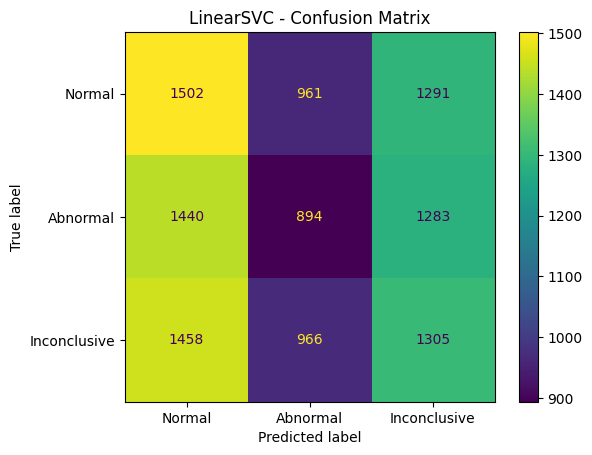

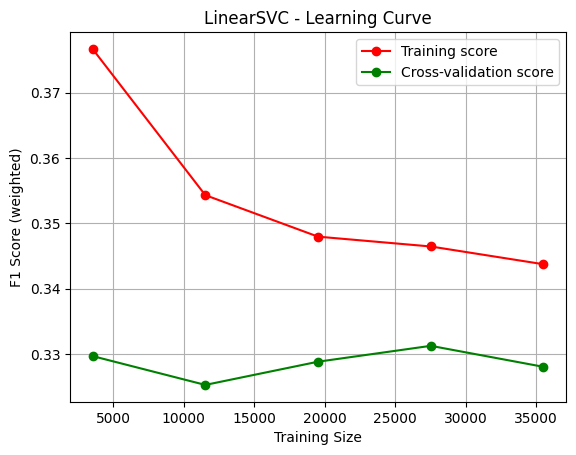

LinearSVC(C=100, max_iter=10000, tol=0.001)

In [23]:
from sklearn.svm import LinearSVC
'''
# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
'''
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Test different regularization strengths
    'max_iter': [1000, 5000, 10000],  # Increase iterations to ensure convergence
    'tol': [1e-4, 1e-3, 1e-2]  # Different tolerance values for convergence
}


# Grid Search for SVM
#model = SVC()
model = LinearSVC(max_iter=10000)
# Evaluate the model
model_selection(model, param_grid_svm, X_train, y_train, X_test, y_test, cv_splits=5)


# Decision Tree

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT
BEST MODEL EXTRACTION
EVALUATION
Model: DecisionTreeClassifier
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Accuracy: 0.3854
Precision: 0.3861
Recall: 0.3854
F1 Score: 0.3835
Confusion Matrix:
[[1670 1105  979]
 [1337 1427  853]
 [1376 1172 1181]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.38      0.44      0.41      3754
         1.0       0.39      0.39      0.39      3617
         2.0       0.39      0.32      0.35      3729

    accuracy                           0.39     11100
   macro avg       0.39      0.39      0.38     11100
weighted avg       0.39      0.39      0.38     11100



<Figure size 640x480 with 0 Axes>

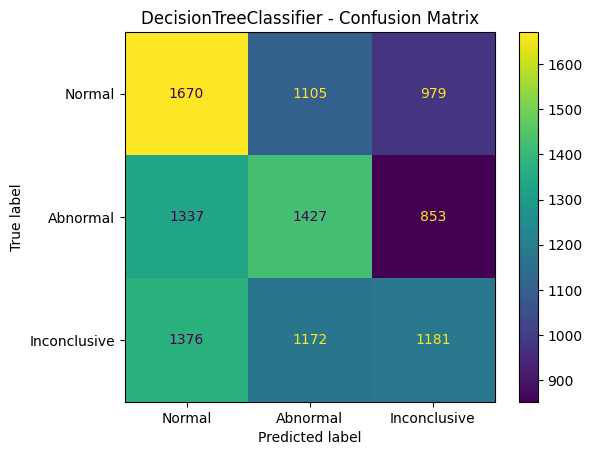

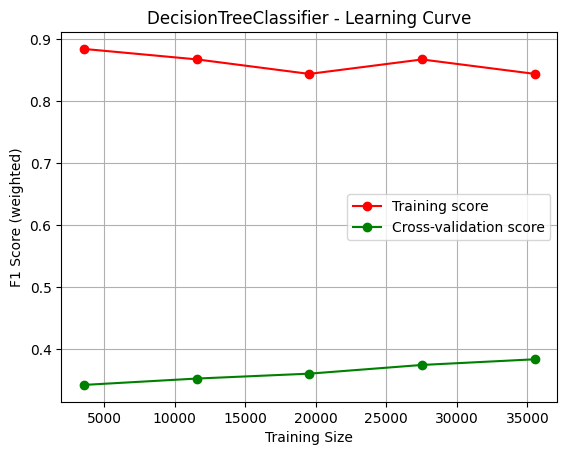

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier()
# Evaluate the model
model_selection(model, param_grid_dt, X_train, y_train, X_test, y_test, cv_splits=5)

The results from the DecisionTreeClassifier, with the best parameters being `{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}`, indicate a modest performance in the multiclass classification task. The model achieved an accuracy of 38.61%, which reflects a relatively low performance given the dataset's complexity. Precision, recall, and F1 scores are all quite similar across the three classes, with values around 0.39, suggesting that the model performs uniformly across the classes but with limited effectiveness. Specifically, the confusion matrix reveals that the model has struggled with classification, as evidenced by the misclassifications between different classes. For instance, the largest number of misclassifications occurs between classes 0 and 1, and classes 1 and 2. The classification report corroborates these findings, with an overall macro average of 0.39 for precision, recall, and F1 score, indicating a balanced but not strong performance.

# AdaBoost

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BEST MODEL EXTRACTION


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EVALUATION
Model: AdaBoostClassifier
Best Parameters: {'n_estimators': 200, 'learning_rate': 1}
Accuracy: 0.3283
Precision: 0.3299
Recall: 0.3283
F1 Score: 0.3221
Confusion Matrix:
[[1248 1684  822]
 [1246 1581  790]
 [1267 1647  815]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33      3754
         1.0       0.32      0.44      0.37      3617
         2.0       0.34      0.22      0.26      3729

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.32     11100
weighted avg       0.33      0.33      0.32     11100



<Figure size 640x480 with 0 Axes>

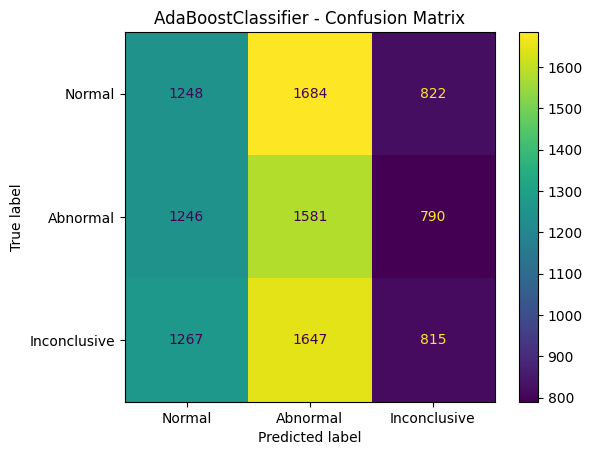

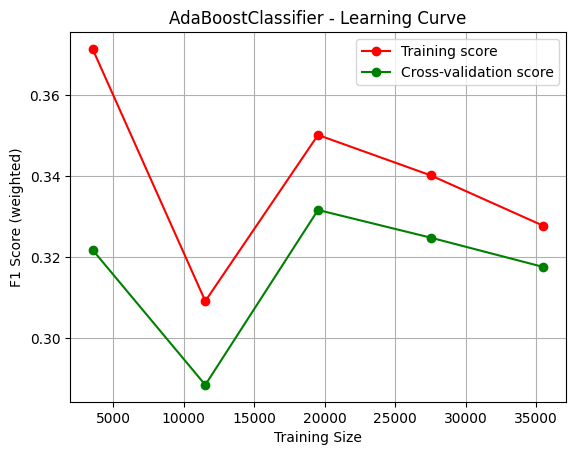

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

model = AdaBoostClassifier()

# Evaluate the model
model_selection(model, param_grid_ab, X_train, y_train, X_test, y_test, cv_splits=5)

The results from the AdaBoostClassifier, with the optimal parameters of `{'n_estimators': 200, 'learning_rate': 1}`, reveal a performance that is lower than desired. The model achieved an accuracy of 34.10%, which indicates that it struggles to effectively classify the instances across the three classes. Precision, recall, and F1 scores hover around 0.34, suggesting that the model performs similarly across all classes but does not excel in distinguishing between them. The confusion matrix shows a significant level of misclassification, with a notable overlap between class predictions, particularly between classes 0 and 1, and classes 1 and 2. The classification report confirms these observations, with an overall macro average of 0.34 for precision, recall, and F1 score.

# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

model = GradientBoostingClassifier()

# Evaluate the model
model_selection(model, param_grid_gb, X_train, y_train, X_test, y_test, cv_splits=5)

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT


KeyboardInterrupt: 

# XGBoost

CROSS VALIDATION
RANDOMIZED SEARCH
RANDOMIZED FIT
BEST MODEL EXTRACTION
EVALUATION
Model: XGBClassifier
Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.3703
Precision: 0.3703
Recall: 0.3703
F1 Score: 0.3702
Confusion Matrix:
[[1315 1173 1241]
 [1062 1351 1204]
 [1160 1150 1444]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.35      0.36      3729
         1.0       0.37      0.37      0.37      3617
         2.0       0.37      0.38      0.38      3754

    accuracy                           0.37     11100
   macro avg       0.37      0.37      0.37     11100
weighted avg       0.37      0.37      0.37     11100



<Figure size 640x480 with 0 Axes>

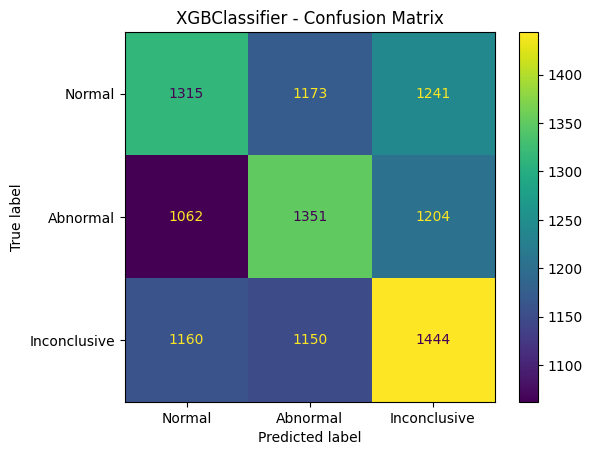

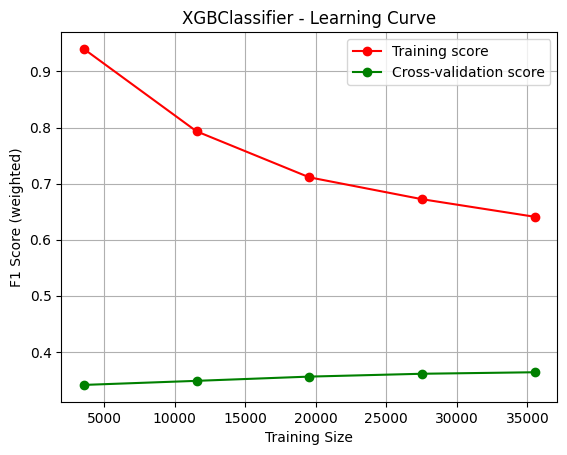

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from xgboost import XGBClassifier

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


model = XGBClassifier()

# Evaluate the model
model_selection(model, param_grid_xgb, X_train, y_train, X_test, y_test, cv_splits=5)

The evaluation of the `XGBClassifier` with the best parameters—`{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}`—indicates moderate performance in the classification task. The model achieved an accuracy of 37.03%, which suggests a modest capability in correctly classifying instances. The precision, recall, and F1 scores are uniformly around 0.37, indicating consistent but limited performance across all classes. The confusion matrix reveals that the model faces significant challenges in distinguishing between classes, with notable misclassifications observed, particularly among classes 0, 1, and 2. The classification report reinforces these findings, showing that while the model performs equally across classes, it does so at a relatively low level of effectiveness. The macro and weighted averages are both 0.37, highlighting the model's balanced but underwhelming performance.